# Case Study on Testing of Hypothesis


A company started to invest in digital marketing as a new way of their product
promotions.For that they collected data and decided to carry out a study on it.
● The company wishes to clarify whether there is any increase in sales after
stepping into digital marketing.
● The company needs to check whether there is any dependency between the
features “Region” and “Manager”.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Sales_add.csv")
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [18]:
data.isna().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

In [4]:
#Descriptive analytics on the dataset

In [19]:
data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [20]:
data.shape

(22, 5)

In [21]:
data.dtypes

Month                             object
Region                            object
Manager                           object
Sales_before_digital_add(in $)     int64
Sales_After_digital_add(in $)      int64
dtype: object

In [22]:
data.isnull().values.any()

False

# Find whether there is any increase in sales after stepping into digital marketing.

In [9]:
#Null Hypothesis:There is increase in sales after stepping in to digital marketing
#Alternat Hypothesis: There is no increase in sales after stepping in to digital marketing

In [23]:
data["Increase in sales"] = data["Sales_After_digital_add(in $)"] - data["Sales_before_digital_add(in $)"]
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $),Increase in sales
0,Month-1,Region - A,Manager - A,132921,270390,137469
1,Month-2,Region - A,Manager - C,149559,223334,73775
2,Month-3,Region - B,Manager - A,146278,244243,97965
3,Month-4,Region - B,Manager - B,152167,231808,79641
4,Month-5,Region - C,Manager - B,159525,258402,98877


In [24]:
data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $),Increase in sales
count,22.000000,22.000000,22.000000
mean,149239.954545,231123.727273,81883.772727
std,14844.042921,25556.777061,31765.635671
min,130263.000000,187305.000000,10110.000000
25%,138087.750000,214960.750000,60094.000000
50%,147444.000000,229986.500000,92763.500000
75%,157627.500000,250909.000000,99342.000000
max,178939.000000,276279.000000,137469.000000


In [25]:
data1=data.drop(['Increase in sales'],axis=1)

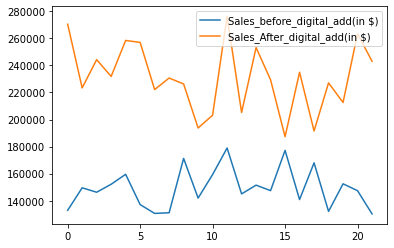

In [26]:
ax = data1.plot.line()

In [44]:
import pandas as pd
from scipy import stats
data=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Sales_add.csv")
data[['Sales_After_digital_add(in $)','Sales_before_digital_add(in $)']].describe()
ttest,pval = stats.ttest_rel(data['Sales_After_digital_add(in $)'],data['Sales_before_digital_add(in $)'])
print("p value is :",pval)


p value is : 6.336667004575778e-11


In [35]:
# Conclusion:A p-value higher than 0.05 (> 0.05) indicates strong evidence for the null hypothesis. This means we retain the null hypothesis and reject the alternative hypothesis. 
#Hence it is ascertained that there is increase in sales after entering in to digital marketing.

# Check whether there is any dependency between the features “Region” and “Manager”.

In [ ]:
#Null hypothesis: There is dependency between the features 'Region' and 'Manager'
#Alternate Hypothesis:There is no dependency between the features 'Region' and 'Manager'

In [ ]:
#The Chi-square test is a non-parametric statistical test that enables us to understand the relationship between the categorical variables of the dataset. That is, it defines the correlation amongst the grouping categorical data.

Using the Chi-square test, we can estimate the level of correlation i.e. association between the categorical variables of the dataset. This helps us analyze the dependence of one category of the variable on the other independent category of the variable.

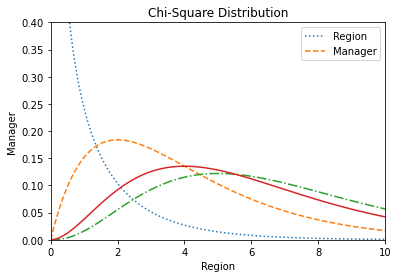

In [29]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
fig,ax = plt.subplots(1,1)

linestyles = [':', '--', '-.', '-']
deg_of_freedom = [1, 4, 7, 6]
for df, ls in zip(deg_of_freedom, linestyles):
  ax.plot(x, stats.chi2.pdf(x, df), linestyle=ls)

plt.xlim(0, 10)
plt.ylim(0, 0.4)

plt.xlabel('Region')
plt.ylabel('Manager')
plt.title('Chi-Square Distribution')

plt.legend(labels=['Region', 'Manager'])
plt.show()

In [30]:
contigency= pd.crosstab(data['Manager'],data['Region'])
contigency

Region,Region - A,Region - B,Region - C
Manager,,,
Manager - A,4,4,1
Manager - B,3,1,3
Manager - C,3,2,1


In [31]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import scipy

In [45]:
c, p, dof, expected = chi2_contingency(contigency)
print("p value is :",p)

p value is : 0.5493991051158094


In [ ]:
Here p-value higher than 0.05 (> 0.05) and it indicates strong evidence for the null hypothesis. This means we retain the null hypothesis and reject the alternative hypothesis. 
Hence it is concluded that there is dependency between the features 'Region' and 'Manager'